In [1]:
import pandas as pd
raw_data = pd.read_excel('C:/Users/DFIT/Desktop/EURUSD/eurusd.xlsx')
raw_data.head()

,time,yesterday_open,yesterday_close,Today Gain,Today loss,RS,RSI,MA 5,Min14,Max14,...,STDEV,Upper Band,Lower Band,yesterday_high,yesterday_low,yesterday_tick_volume,Normalized tick volume,today_open,today_high,today_low
0,2023-01-02,1.07016,1.06665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.07017,1.06499,16741,0.052053,1.06642,1.06830,1.05196
1,2023-01-03,1.06642,1.05470,0.000000,1.120330,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.06830,1.05196,139201,0.432816,1.05465,1.06354,1.05402
2,2023-01-04,1.05465,1.06030,0.530957,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.06354,1.05402,140651,0.437325,1.06015,1.06315,1.05150
3,2023-01-05,1.06015,1.05207,0.000000,0.776195,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.06315,1.05150,126223,0.392464,1.05205,1.06481,1.04832
4,2023-01-06,1.05205,1.06427,1.159619,0.000000,NaN,NaN,1.059598,NaN,NaN,...,NaN,NaN,NaN,1.06481,1.04832,126014,0.391814,1.06394,1.07607,1.06360


In [2]:
data_filter =raw_data.drop(['Min14','Max14','Upper Band','time'], axis = 1)
data_filter

,yesterday_open,yesterday_close,Today Gain,Today loss,RS,RSI,MA 5,Stochastic Oscillator,MA20,STDEV,Lower Band,yesterday_high,yesterday_low,yesterday_tick_volume,Normalized tick volume,today_open,today_high,today_low
0,1.07016,1.06665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.07017,1.06499,16741,0.052053,1.06642,1.06830,1.05196
1,1.06642,1.05470,0.000000,1.120330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06830,1.05196,139201,0.432816,1.05465,1.06354,1.05402
2,1.05465,1.06030,0.530957,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06354,1.05402,140651,0.437325,1.06015,1.06315,1.05150
3,1.06015,1.05207,0.000000,0.776195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06315,1.05150,126223,0.392464,1.05205,1.06481,1.04832
4,1.05205,1.06427,1.159619,0.000000,NaN,NaN,1.059598,NaN,NaN,NaN,NaN,1.06481,1.04832,126014,0.391814,1.06394,1.07607,1.06360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1.04147,1.04228,0.073931,0.000000,0.557885,35.810403,1.040516,35.523979,1.046752,0.006776,1.033200,1.04441,1.04050,29312,0.673421,1.04251,1.04582,1.03715
519,1.04251,1.04030,0.000000,0.189968,0.569990,36.305322,1.040534,30.636132,1.046287,0.006889,1.032510,1.04582,1.03715,35137,0.807246,1.04039,1.04243,1.03438
520,1.04039,1.03493,0.000000,0.516197,0.527352,34.527207,1.039726,3.396029,1.045509,0.007258,1.030994,1.04243,1.03438,35610,0.818113,1.03515,1.03757,1.02239
521,1.03515,1.02558,0.000000,0.903443,0.430903,30.114063,1.036920,10.280374,1.044258,0.008400,1.027457,1.03757,1.02239,43527,1.000000,1.02556,1.03098,1.02513


In [3]:
# 1. Feature and Target Selection
raw_features = data_filter.drop(['today_high','today_low'], axis = 1)
raw_targets =  data_filter[['today_high','today_low']]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_features)

In [5]:
# Drop all rows with NA values
dataframe = pd.DataFrame(scaled_data)
features = dataframe.iloc[19:-1].reset_index(drop=True)
targets = raw_targets.iloc[19:-1].reset_index(drop=True)

In [6]:
features.shape

(503, 16)

In [7]:
targets.shape

(503, 2)

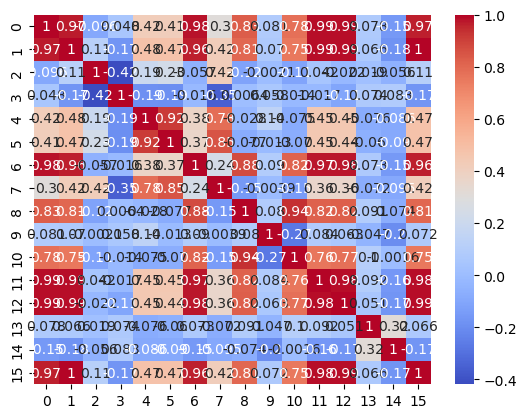

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# কোরিলেশন ম্যাট্রিক্স তৈরি করুন
corr_matrix = features.corr()

# কোরিলেশন হিটম্যাপ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [44]:
# 3. Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.05, random_state = 1)

In [46]:
# 4. Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
 #5. Model Evaluation
predictions = model.predict(X_test)
Predict_result = pd.DataFrame(predictions, columns=['Predicted_today_high', 'Predicted_today_low'])

In [52]:
df_concat_reset = pd.concat([Predict_result.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
df_concat_reset = df_concat_reset[['today_high','Predicted_today_high','today_low','Predicted_today_low']]
df_concat_reset.head(20)

,today_high,Predicted_today_high,today_low,Predicted_today_low
0,1.08369,1.079946,1.07640,1.073969
1,1.08610,1.085487,1.08047,1.079529
2,1.09696,1.098937,1.08911,1.091308
3,1.10916,1.103848,1.09969,1.097057
4,1.08299,1.085064,1.08092,1.078603
5,1.11396,1.113581,1.10550,1.105934
6,1.07563,1.077588,1.06992,1.071196
7,1.07496,1.078310,1.06790,1.069450
8,1.07874,1.079719,1.07319,1.073314
9,1.07225,1.074593,1.06747,1.067022


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"Mean Absolute Error for high: {mean_absolute_error(df_concat_reset['today_high'], df_concat_reset['Predicted_today_high'])}")
print(f"Mean Absolute Error for low: {mean_absolute_error(df_concat_reset['today_low'], df_concat_reset['Predicted_today_low'])}")
print(f"Mean Absolute Error for high: {mean_squared_error(df_concat_reset['today_high'], df_concat_reset['Predicted_today_high'])}")
print(f"Mean Absolute Error for low: {mean_squared_error(df_concat_reset['today_low'], df_concat_reset['Predicted_today_low'])}")
print(f"R^2 Score: {r2_score(y_test, predictions):.2f}")

Mean Absolute Error for high: 0.0018084354366234225
Mean Absolute Error for low: 0.0015560535695080535
Mean Absolute Error for high: 4.988736664957831e-06
Mean Absolute Error for low: 3.1939616295360345e-06
R^2 Score: 0.99


In [56]:
high_low_diff = df_concat_reset['Predicted_today_high']-df_concat_reset['Predicted_today_low']
mean_error = abs(df_concat_reset['today_high']-df_concat_reset['Predicted_today_high'])
mean_error

0     0.003744
1     0.000613
2     0.001977
3     0.005312
4     0.002074
5     0.000379
6     0.001958
7     0.003350
8     0.000979
9     0.002343
10    0.000661
11    0.002467
12    0.000036
13    0.000273
14    0.003225
15    0.002898
16    0.000706
17    0.001309
18    0.000183
19    0.000488
20    0.002634
21    0.000006
22    0.002795
23    0.002294
24    0.002285
25    0.002031
dtype: float64

(0.0, 0.007)

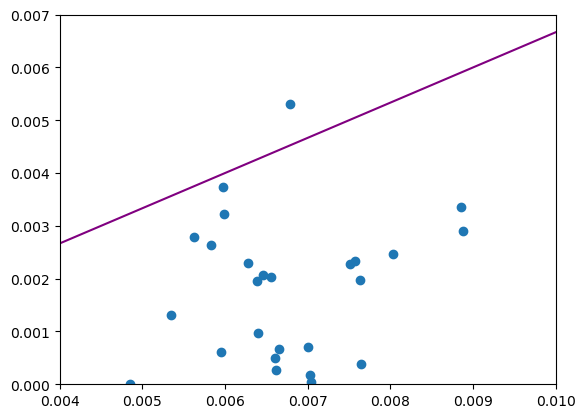

In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(high_low_diff,mean_error)
x = np.linspace(0, 10, 100)
y=x/1.5
# Plot the line
plt.plot(x, y, label="y = 2x", color="purple")
plt.xlim(0.004,0.01)
plt.ylim(0,0.007)

In [62]:
test = dataframe.iloc[[-1]]
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
522,-3.232587,-2.903889,1.403029,-0.646363,-0.793403,-1.007852,-2.807156,-0.604671,-2.691631,0.309715,-2.707024,-3.146802,-3.040163,-0.740242,2.509691,-2.903778


In [17]:
decision = model.predict(test).round(5)

In [64]:
candle_size = decision[0,0]-decision[0,1]
flactuation = round(candle_size / 1.5, 5)
if candle_size<=0.005:
    print('Trading is not worthy. Dont take trade')

In [66]:
final_prediction = pd.DataFrame(decision, columns=['Predicted_high', 'Predicted_low'])
final_prediction['Stop loss for high'] = final_prediction['Predicted_high'] + flactuation
final_prediction['Stop loss for low'] = final_prediction['Predicted_low'] - flactuation
final_prediction['Take profit for low'] = 'Predicted high-(Predicted low - real low)-0.0005'
final_prediction['Take profit for high'] = 'Predicted low+(Real high - Predicted high)+0.0005'
final_prediction = final_prediction[['Predicted_high','Stop loss for high','Take profit for high','Predicted_low','Stop loss for low','Take profit for low']]
final_prediction

,Predicted_high,Stop loss for high,Take profit for high,Predicted_low,Stop loss for low,Take profit for low
0,1.03418,1.03809,Predicted low+(Real high - Predicted high)+0.0005,1.02832,1.02441,Predicted high-(Predicted low - real low)-0.0005
